In [148]:
import numpy as np
import pandas as pd

#data = pd.read_csv(r'C:\Users\Gareth.Ahern\Desktop\NonCommercialOver1000\Attempt2\13.csv')
#data.head()

flights_df = pd.read_csv(r"C:\Users\Gareth.Ahern\Desktop\NonCommercialOver1000\Attempt2\13.csv")                                    
flights13 = gpd.GeoDataFrame(flights_df, geometry=gpd.points_from_xy(flights_df.Latitude,flights_df.Longitude))
              
flights_df = pd.read_csv(r"C:\Users\Gareth.Ahern\Desktop\NonCommercialOver1000\Attempt2\14.csv")
flights14 = gpd.GeoDataFrame(flights_df, geometry=gpd.points_from_xy(flights_df.Latitude,flights_df.Longitude))
              
flights_df = pd.read_csv(r"C:\Users\Gareth.Ahern\Desktop\NonCommercialOver1000\Attempt2\15.csv")
flights15 = gpd.GeoDataFrame(flights_df, geometry=gpd.points_from_xy(flights_df.Latitude,flights_df.Longitude))
                                    
flights_df = pd.read_csv(r"C:\Users\Gareth.Ahern\Desktop\NonCommercialOver1000\Attempt2\16.csv")
flights16 = gpd.GeoDataFrame(flights_df, geometry=gpd.points_from_xy(flights_df.Latitude,flights_df.Longitude))

flights_df = pd.read_csv(r"C:\Users\Gareth.Ahern\Desktop\NonCommercialOver1000\Attempt2\17.csv")
flights17 = gpd.GeoDataFrame(flights_df, geometry=gpd.points_from_xy(flights_df.Latitude,flights_df.Longitude))

flights_df = pd.read_csv(r"C:\Users\Gareth.Ahern\Desktop\NonCommercialOver1000\Attempt2\18.csv")
flights18 = gpd.GeoDataFrame(flights_df, geometry=gpd.points_from_xy(flights_df.Latitude,flights_df.Longitude))

flights_df = pd.read_csv(r"C:\Users\Gareth.Ahern\Desktop\NonCommercialOver1000\Attempt2\19.csv")
flights19 = gpd.GeoDataFrame(flights_df, geometry=gpd.points_from_xy(flights_df.Latitude,flights_df.Longitude))

#I then merge all my geopanda'd dataframs into one mega-dataframe
frames = [flights13,flights14,flights15,flights16,flights17,flights18,flights19]
data = pd.concat(frames) 
data.head()


,Flight_ID,Position_DateTime,Latitude,Longitude,geometry
0,619465375,13/07/2020 09:07,52.35548,0.27679,POINT (52.35548 0.27679)
1,619465375,13/07/2020 09:07,52.36037,0.28023,POINT (52.36037 0.28023)
2,619465375,13/07/2020 09:07,52.36633,0.28447,POINT (52.36633 0.28447)
3,619465375,13/07/2020 09:07,52.37145,0.28808,POINT (52.37145 0.28808)
4,619465375,13/07/2020 09:08,52.38872,0.30212,POINT (52.38872 0.30212)


In [150]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data.drop(['Longitude', 'Latitude'], axis=1), crs={'init': 'epsg:4326'}, geometry=geometry)
type(gdf)

geopandas.geodataframe.GeoDataFrame

C:\Users\Gareth.Ahern\anaconda3\lib\site-packages\pandas\core\groupby\ops.py:958: FutureWarning:

    You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.



          shape_name                                           geometry
0  FARNBOROUGH CTA 2  POLYGON ((-0.91885 51.28479, -0.84823 51.17637...
1          Luton CTR  POLYGON ((-0.64111 51.87889, -0.40722 51.91972...
2    Stanstead CTA 3  POLYGON ((0.55389 51.97444, 0.58417 51.89694, ...
3      Stanstead CTR  POLYGON ((0.44806 51.75083, 0.21917 51.75222, ...
{'init': 'epsg:4326'}
{'init': 'epsg:4326'}
Index(['shape_name', 'geometry'], dtype='object')


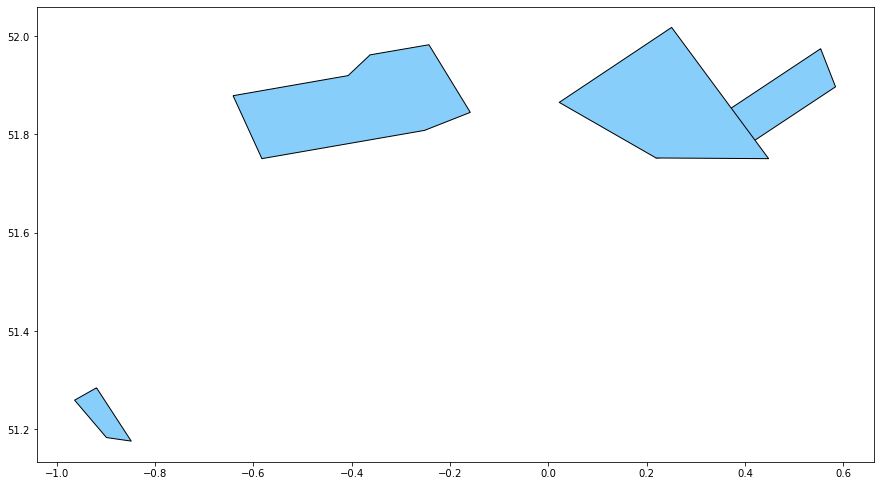

In [159]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point, Polygon

df = gp.GeoDataFrame( [['FARNBOROUGH CTA 2',1,Point(-0.918847222,51.28478889)], 
                   ['FARNBOROUGH CTA 2',2,Point(-0.848226861,51.17636658)],
                   ['FARNBOROUGH CTA 2',3,Point(-0.898699694,51.18359642)],
                   ['FARNBOROUGH CTA 2',4,Point(-0.963383333,51.25968333)],
                   ['Stanstead CTA 3',1,Point(0.553888889,51.97444444)],
                   ['Stanstead CTA 3',2,Point(0.584166667,51.89694444)],
                   ['Stanstead CTA 3',3,Point(0.385833333,51.76555556)],
                   ['Stanstead CTA 3',4,Point(0.219166667,51.75222222)],  
                     
                   ['Luton CTR',1,Point(-0.641111111,51.87888889)],
                   ['Luton CTR',2,Point(-0.407222222,51.91972222)],
                   ['Luton CTR',3,Point(-0.3625,51.96194444)],
                   ['Luton CTR',4,Point(-0.242777778,51.9825)],
                   ['Luton CTR',5,Point(-0.158611111,51.845)],
                   ['Luton CTR',6,Point(-0.251666667,51.80833333)],
                   ['Luton CTR',7,Point(-0.5825,51.75083333)],
 
                   ['Stanstead CTR',1,Point(0.448055556,51.75083333)],  
                   ['Stanstead CTR',1,Point(0.219166667,51.75222222)],    
                   ['Stanstead CTR',1,Point(0.022222222,51.86527778)],  
                   ['Stanstead CTR',1,Point(0.250833333,52.01777778)],                      
                       
                      ],  
                 columns = ['shape_name',"shape_id", 'geometry'], 
                 geometry='geometry')

# Extract the coordinates from the Point object
df['geometry'] = df['geometry'].apply(lambda x: x.coords[0])

# Group by shape ID 
#  1. Get all of the coordinates for that ID as a list
#  2. Convert that list to a Polygon
df = df.groupby('shape_name')['geometry'].apply(lambda x: Polygon(x.tolist())).reset_index()

# Declare the result as a new a GeoDataFrame
map_data = gp.GeoDataFrame(df,crs={'init': 'epsg:4326'}, geometry = 'geometry')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,15))
map_data.plot(ax = ax, color = 'lightskyblue', edgecolor = 'black')
print(map_data.crs)
print(map_data.columns)

In [173]:
data_with_counties = gpd.sjoin(gdf, map_data, how="inner", op='intersects')

data_with_counties = data_with_counties.reindex(columns=['Flight_ID ','shape_name'])

data_with_counties = data_with_counties.groupby(['shape_name']).size().reset_index(name='counts')
data_with_counties.reset_index(inplace=True)
data_with_counties.head()

,index,shape_name,counts
0,0,FARNBOROUGH CTA 2,902
1,1,Luton CTR,6747
2,2,Stanstead CTA 3,573
3,3,Stanstead CTR,3233


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

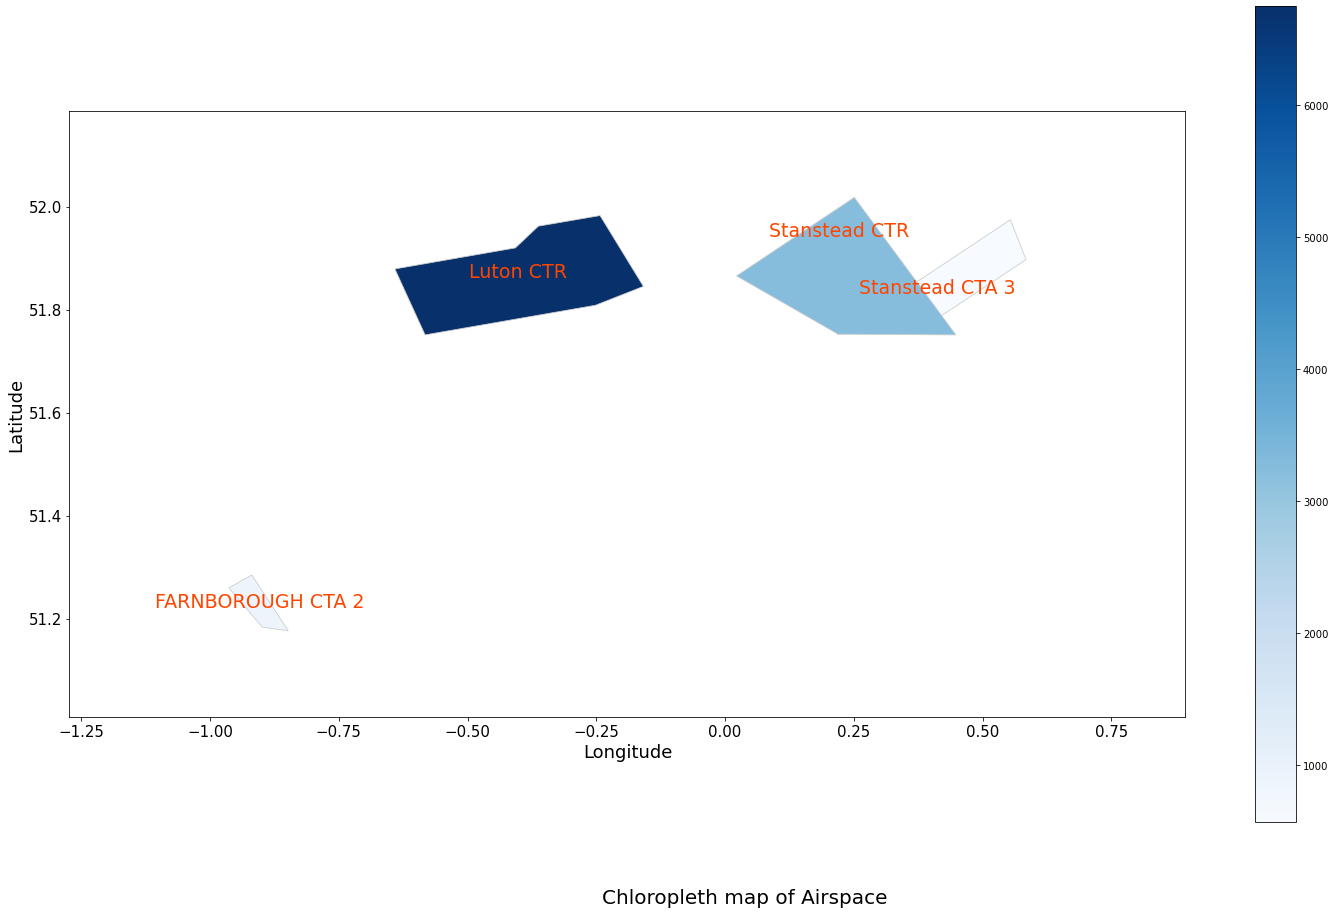

In [188]:
merged_df = map_data.set_index('shape_name').join(data_with_counties.set_index('shape_name'))
merged_df.reset_index(inplace=True)

fig, ax = plt.subplots(1, figsize=(25, 15))
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df['coords'] = [coords[0] for coords in merged_df['coords']]

for idx, row in merged_df.iterrows():
    plt.annotate(text=row['shape_name'], xy=row['coords'], horizontalalignment='center', color='orangered',fontsize=19)
    
ax.margins(0.2, 0.2)
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
txt='Chloropleth map of Airspace'
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=20)

merged_df.plot(column='counts', ax=ax, legend=True, cmap='Blues', linewidth=0.8, edgecolor='0.8')